<a href="https://colab.research.google.com/github/nightitachi/Block-Notes/blob/main/Student_Depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score , classification_report

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC


In [3]:
data = pd.read_csv('Student Depression Dataset.csv')

In [4]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [5]:
data.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,Less than 5 hours,Healthy,BCA,Yes,2.0,3.0,Yes,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [7]:
data.shape

(27901, 18)

In [8]:
data.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [9]:
data.dtypes

,0
id,int64
Gender,object
Age,float64
City,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64
Study Satisfaction,float64
Job Satisfaction,float64


# Cleaning Data

In [10]:
median = data['Financial Stress'].median()
data['Financial Stress'] = data['Financial Stress'].fillna(median)

In [11]:
data.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [12]:
La = LabelEncoder()
obj = data.select_dtypes(include='object')
non_obj = data.select_dtypes(exclude='object')



In [13]:
for i in range(obj.shape[1]):
  col_name= obj.columns[i]
  obj[col_name] = La.fit_transform(obj[col_name])
obj

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
0,1,51,11,0,0,3,1,0
1,0,3,11,0,1,10,0,1
2,1,44,11,2,0,5,0,1
3,0,49,11,1,1,7,1,1
4,0,16,11,0,1,17,1,0
...,...,...,...,...,...,...,...,...
27896,0,45,11,0,3,11,1,1
27897,1,25,11,2,0,25,0,1
27898,1,9,11,0,3,22,0,0
27899,0,25,11,2,0,11,1,0


In [14]:
obj = obj.astype('int')
data = pd.concat([obj, non_obj] , axis=1)
data


,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
0,1,51,11,0,0,3,1,0,2,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,1
1,0,3,11,0,1,10,0,1,8,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0,0
2,1,44,11,2,0,5,0,1,26,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0,0
3,0,49,11,1,1,7,1,1,30,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1
4,0,16,11,0,1,17,1,0,32,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,45,11,0,3,11,1,1,140685,27.0,5.0,0.0,5.75,5.0,0.0,7.0,1.0,0
27897,1,25,11,2,0,25,0,1,140686,27.0,2.0,0.0,9.40,3.0,0.0,0.0,3.0,0
27898,1,9,11,0,3,22,0,0,140689,31.0,3.0,0.0,6.61,4.0,0.0,12.0,2.0,0
27899,0,25,11,2,0,11,1,0,140690,18.0,5.0,0.0,6.88,2.0,0.0,10.0,5.0,1


In [15]:
data = data.drop(['Job Satisfaction' , 'id'] , axis=1)


In [16]:
data = data.drop(['City'], axis=1)

In [17]:
data

,Gender,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
0,1,11,0,0,3,1,0,33.0,5.0,0.0,8.97,2.0,3.0,1.0,1
1,0,11,0,1,10,0,1,24.0,2.0,0.0,5.90,5.0,3.0,2.0,0
2,1,11,2,0,5,0,1,31.0,3.0,0.0,7.03,5.0,9.0,1.0,0
3,0,11,1,1,7,1,1,28.0,3.0,0.0,5.59,2.0,4.0,5.0,1
4,0,11,0,1,17,1,0,25.0,4.0,0.0,8.13,3.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,11,0,3,11,1,1,27.0,5.0,0.0,5.75,5.0,7.0,1.0,0
27897,1,11,2,0,25,0,1,27.0,2.0,0.0,9.40,3.0,0.0,3.0,0
27898,1,11,0,3,22,0,0,31.0,3.0,0.0,6.61,4.0,12.0,2.0,0
27899,0,11,2,0,11,1,0,18.0,5.0,0.0,6.88,2.0,10.0,5.0,1


# Exploring Data

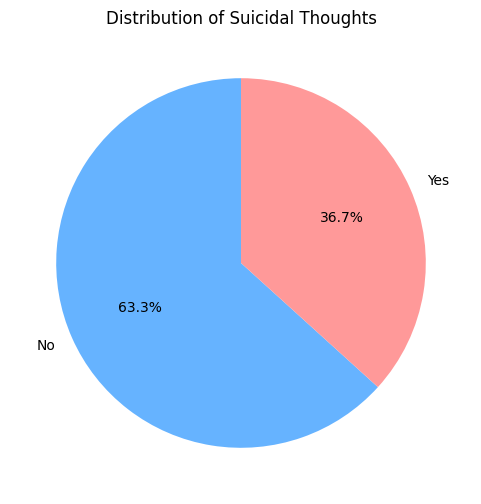

In [18]:

value_counts = data['Have you ever had suicidal thoughts ?'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Suicidal Thoughts')

plt.show()


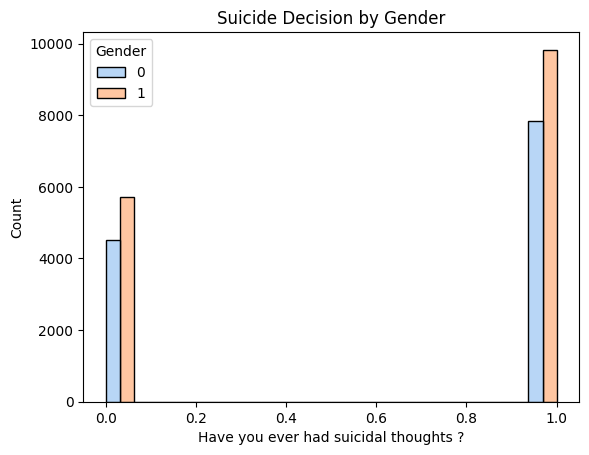

In [19]:
suicide_decision = sns.histplot(
    x=data['Have you ever had suicidal thoughts ?'],
    hue=data['Gender'],
    multiple="dodge",
    palette="pastel"
)
plt.title('Suicide Decision by Gender')
plt.xlabel('Have you ever had suicidal thoughts ?')
plt.ylabel('Count')
plt.show()

<ipython-input-20-805db6d2c221>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Gender'], palette='pastel')


Text(0, 0.5, 'Count')

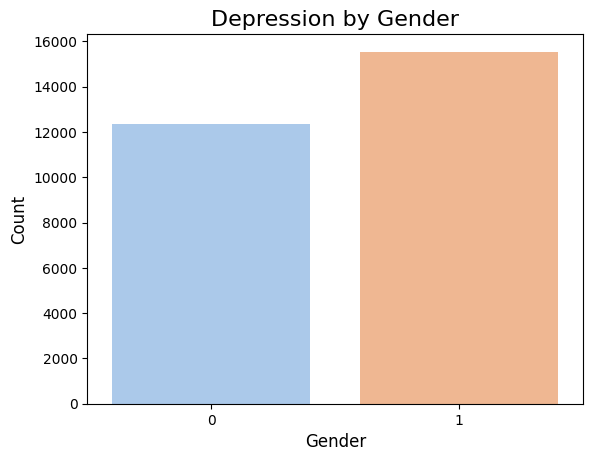

In [20]:
sns.countplot(x=data['Gender'], palette='pastel')
plt.title('Depression by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [21]:
scaler = StandardScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data['Academic Pressure'] = scaler.fit_transform(data[['Academic Pressure']])

In [22]:
data

,Gender,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
0,1,11,0,0,3,1,0,1.463165,1.345543,0.0,8.97,2.0,3.0,1.0,1
1,0,11,0,1,10,0,1,-0.371474,-0.826104,0.0,5.90,5.0,3.0,2.0,0
2,1,11,2,0,5,0,1,1.055467,-0.102222,0.0,7.03,5.0,9.0,1.0,0
3,0,11,1,1,7,1,1,0.443921,-0.102222,0.0,5.59,2.0,4.0,5.0,1
4,0,11,0,1,17,1,0,-0.167625,0.621660,0.0,8.13,3.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,11,0,3,11,1,1,0.240073,1.345543,0.0,5.75,5.0,7.0,1.0,0
27897,1,11,2,0,25,0,1,0.240073,-0.826104,0.0,9.40,3.0,0.0,3.0,0
27898,1,11,0,3,22,0,0,1.055467,-0.102222,0.0,6.61,4.0,12.0,2.0,0
27899,0,11,2,0,11,1,0,-1.594566,1.345543,0.0,6.88,2.0,10.0,5.0,1


# Training Model

In [23]:
models={
    'logistic regression ' : LogisticRegression(),
    'XGB Classifier' : XGBClassifier(),
    'Support Vector Machine' : SVC(),
    'Gaussian Nb' : GaussianNB(),
    'Gradiant Boosting Classifier' : GradientBoostingClassifier(),
    }

In [24]:
x= data.drop(columns=['Depression'])
y= data['Depression']

In [25]:
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=.2)

In [26]:
def Accuracies(model_name , model):
  print(f"Evaluating_model : {model_name}")
  model.fit(x_train, y_train)
  pre= model.predict(x_test)
  accuracy = accuracy_score(pre ,y_test)
  print(classification_report(pre , y_test))

In [27]:
for model_name , model in models.items():
  Accuracies(model_name , model)

Evaluating_model : logistic regression 
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      2193
           1       0.88      0.86      0.87      3388

    accuracy                           0.84      5581
   macro avg       0.83      0.84      0.84      5581
weighted avg       0.84      0.84      0.84      5581

Evaluating_model : XGB Classifier
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      2216
           1       0.87      0.85      0.86      3365

    accuracy                           0.83      5581
   macro avg       0.82      0.83      0.83      5581
weighted avg       0.83      0.83      0.83      5581

Evaluating_model : Support Vector Machine
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      2160
           1       0.89      0.85      0.87      3421

    accuracy                           0.84      5581
   macro avg

In [28]:
lrmodel=LogisticRegression()
lrmodel.fit(x_train,y_train)

LogisticRegression()

In [29]:
logy_pred=lrmodel.predict(x_test)
print(accuracy_score(logy_pred,y_test))

0.8432180612793406


In [30]:
print(classification_report(logy_pred , y_test))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      2193
           1       0.88      0.86      0.87      3388

    accuracy                           0.84      5581
   macro avg       0.83      0.84      0.84      5581
weighted avg       0.84      0.84      0.84      5581



In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [40]:
best_lr_model = LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='liblinear')
lrmodel.fit(x_train,y_train)

LogisticRegression()

In [42]:
pre = lrmodel.predict(x_test)
pre

array([1, 0, 1, ..., 1, 1, 1])

In [45]:
acc = accuracy_score(y_test , pre)
acc

0.8432180612793406

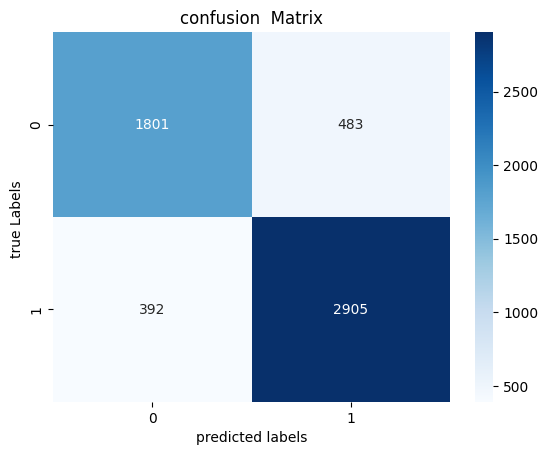

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sns.heatmap(confusion_matrix(y_test, pre) , annot=True , fmt='d' ,cmap='Blues' )
plt.title('confusion  Matrix')
plt.xlabel('predicted labels')
plt.ylabel('true Labels ')
plt.show()